In [ ]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

from skactiveml.pool import UncertaintySampling, QueryByCommittee
from skactiveml.utils import labeled_indices, MISSING_LABEL
from skactiveml.classifier import SklearnClassifier, ParzenWindowClassifier
from skactiveml.visualization import plot_utilities, plot_decision_boundary

from matplotlib import pyplot as plt

from ucimlrepo import fetch_ucirepo 

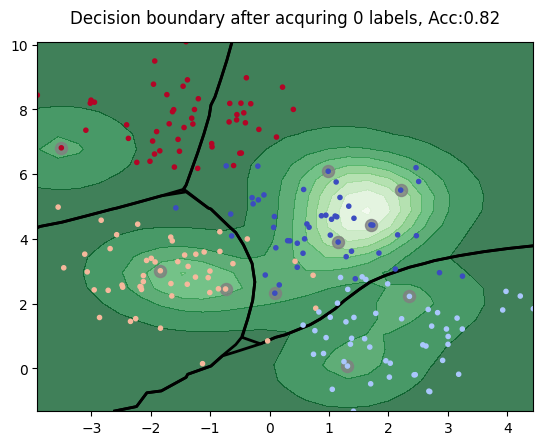

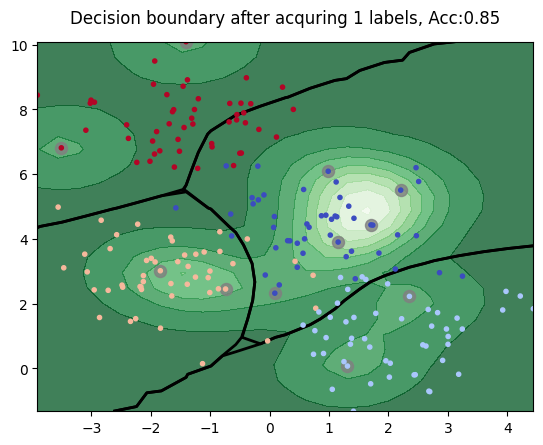

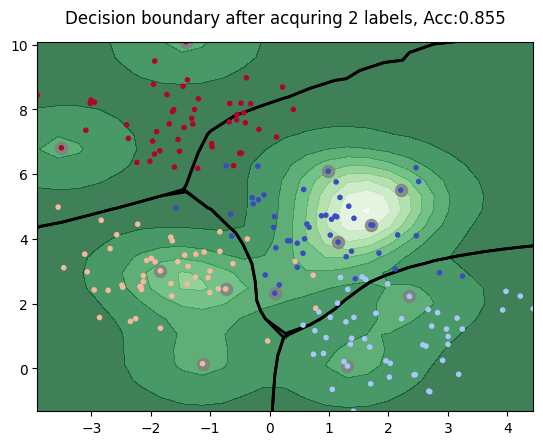

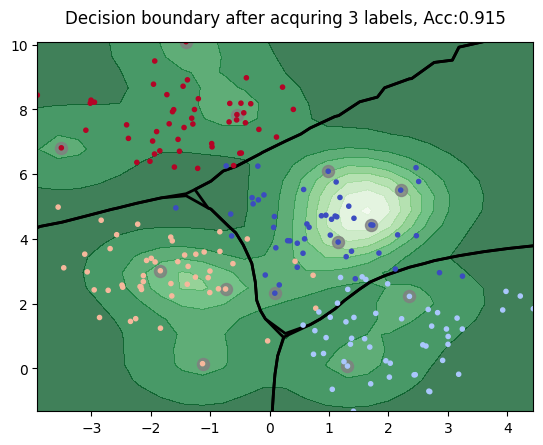

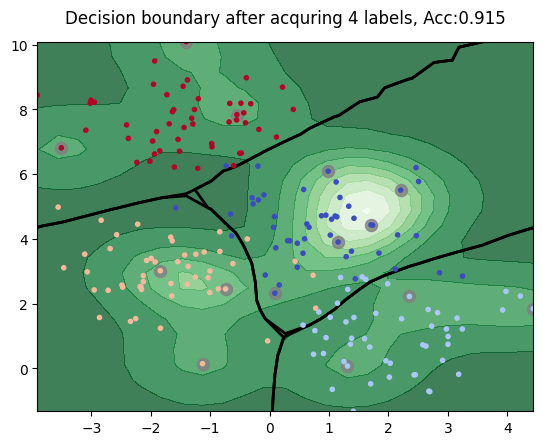

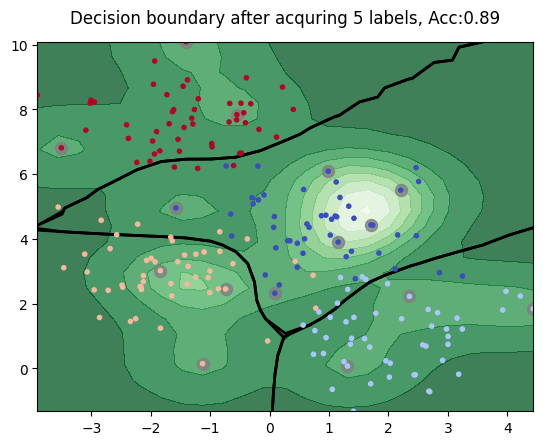

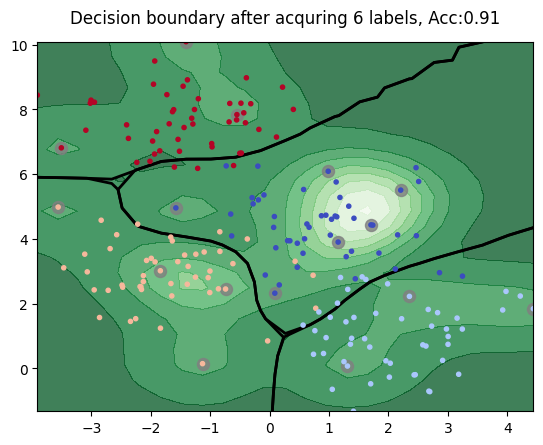

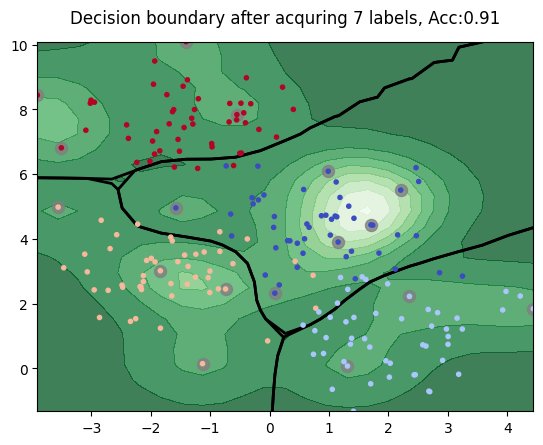

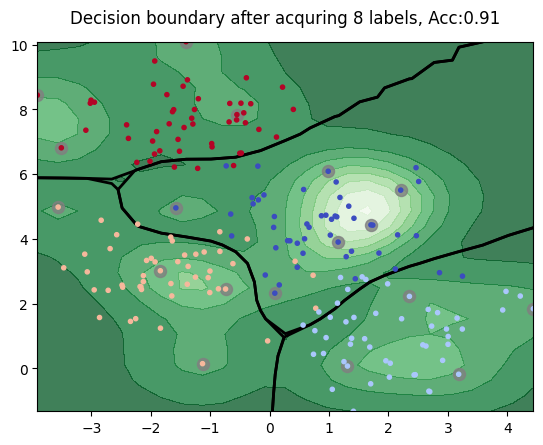

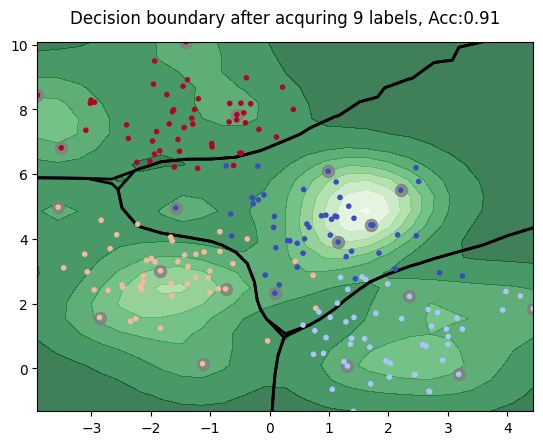

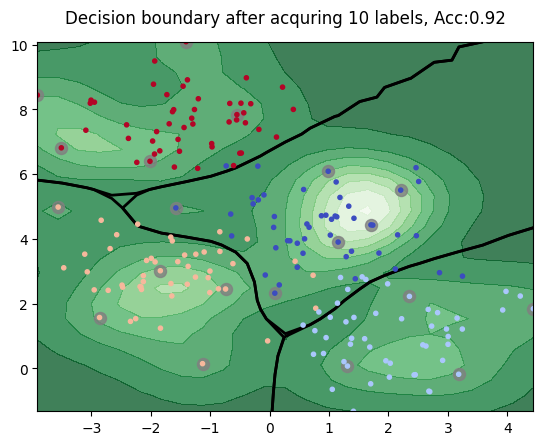

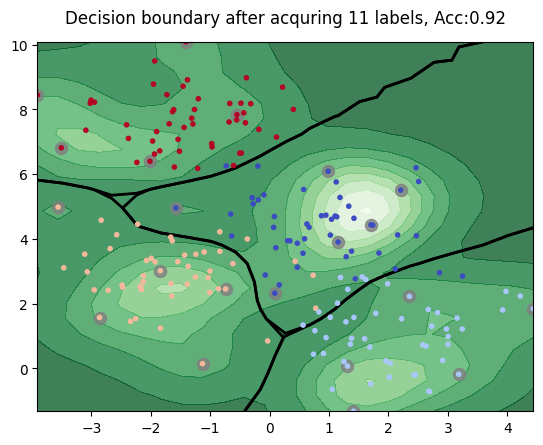

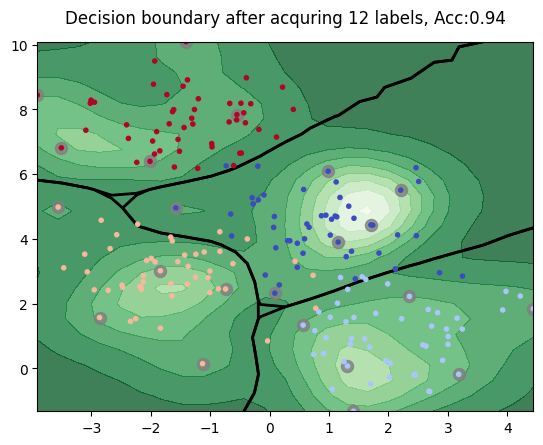

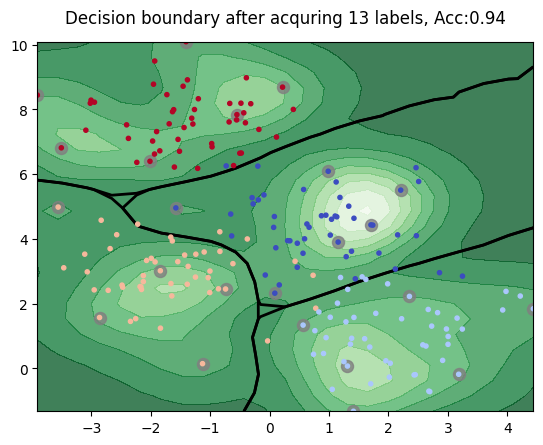

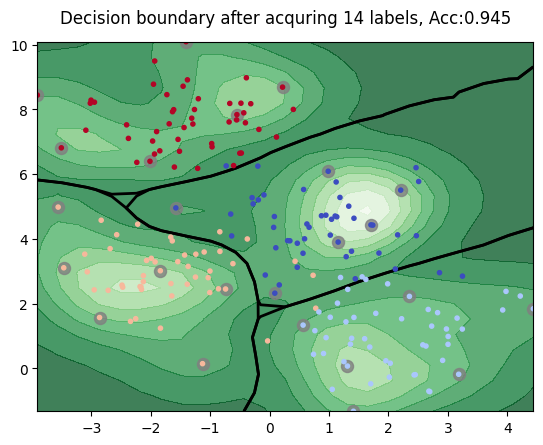

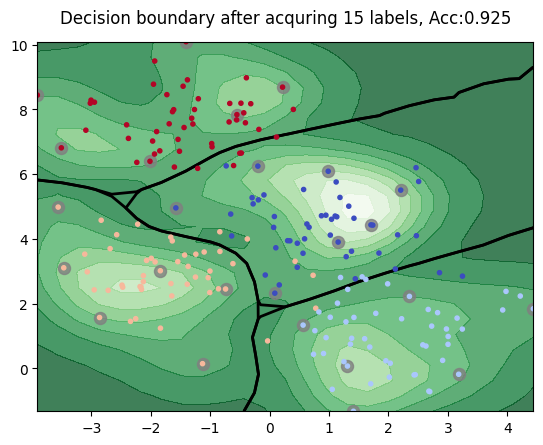

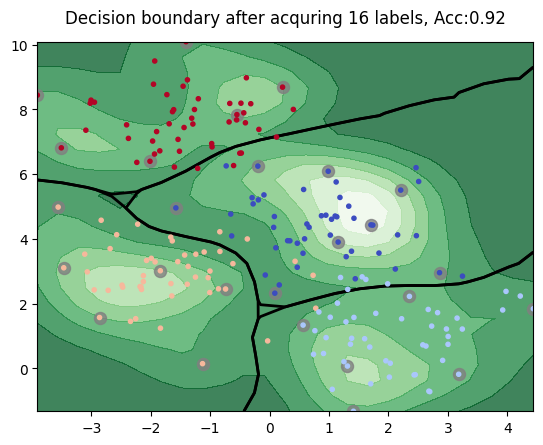

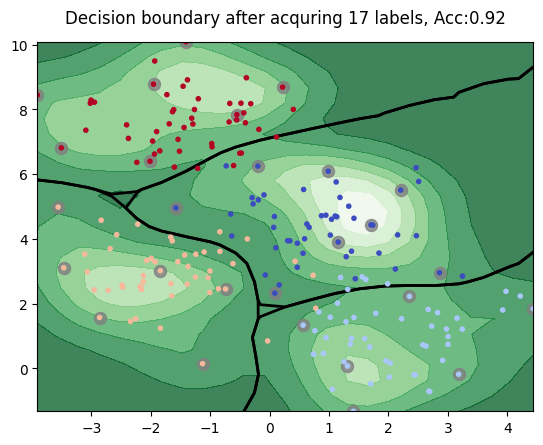

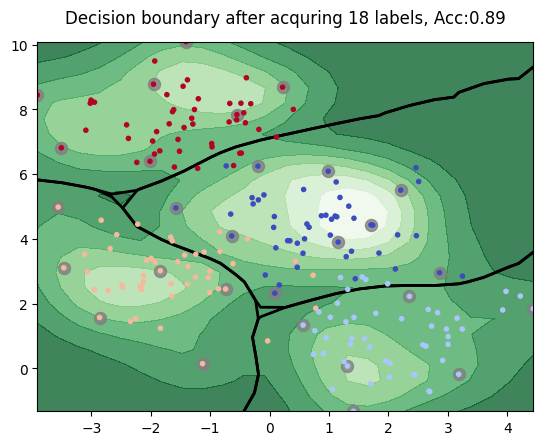

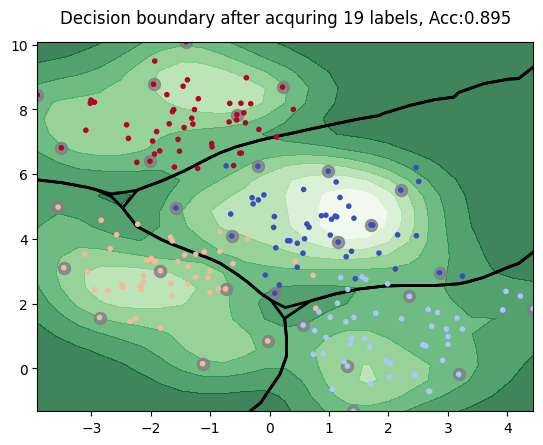

In [2]:
# Generate data set.
X, y_true = make_blobs(n_samples=200, centers=4, random_state=0)
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

# Use the first 10 instances as initial training data.
y[:10] = y_true[:10]

# Create classifier and query strategy.
clf = SklearnClassifier(
    GaussianProcessClassifier(random_state=0),
    classes=np.unique(y_true),
    random_state=0
)
qs = UncertaintySampling(method='entropy')

# Preparation for plotting.
feature_bound = [[min(X[:, 0]), min(X[:, 1])], [max(X[:, 0]), max(X[:, 1])]]

# Execute active learning cycle.
n_cycles = 20
for c in range(n_cycles):
    fig, ax = plt.subplots()

    # Fit final classifier.
    clf.fit(X, y)

    # Get labeled instances.
    X_labeled = X[labeled_indices(y)]

    query_idx = qs.query(X=X, y=y, clf=clf)
    acc = accuracy_score(y_true, clf.predict(X))

    # Plot the labeled data.
    coll_old = list(ax.collections)
    title = ax.text(
        0.5, 1.05, f"Decision boundary after acquring {c} labels, Acc:{acc}",
        size=plt.rcParams["axes.titlesize"], ha="center",
        transform=ax.transAxes
    )

    ax = plot_utilities(qs, X=X, y=y, clf=clf,
                        candidates=None, res=25,
                        feature_bound=feature_bound, ax=ax)
    ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", marker=".",
               zorder=2)
    ax.scatter(X_labeled[:, 0], X_labeled[:, 1], c="grey", alpha=.8,
               marker=".", s=300)
    ax = plot_decision_boundary(clf, feature_bound, ax=ax)

    y[query_idx] = y_true[query_idx]

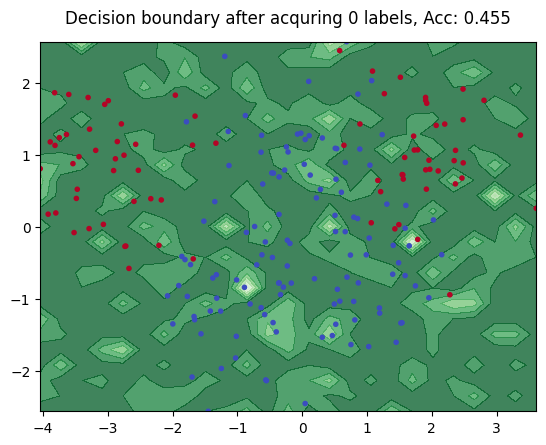

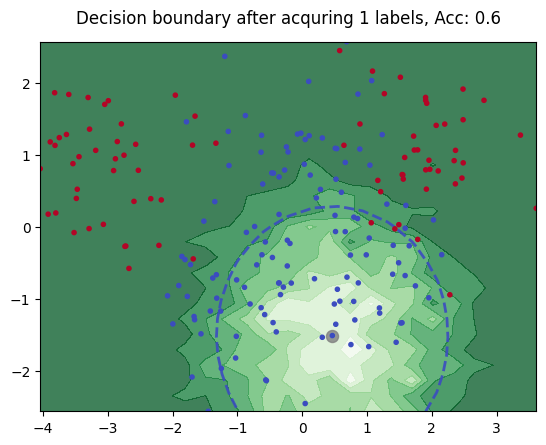

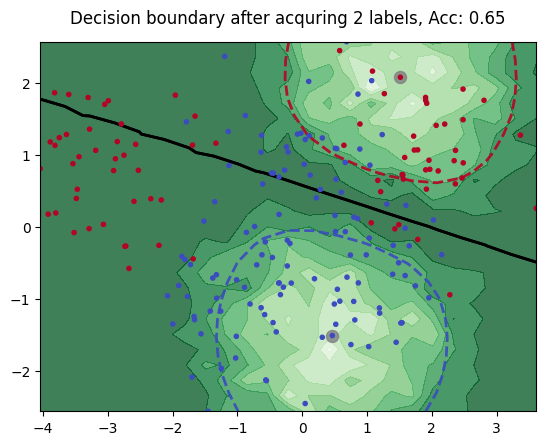

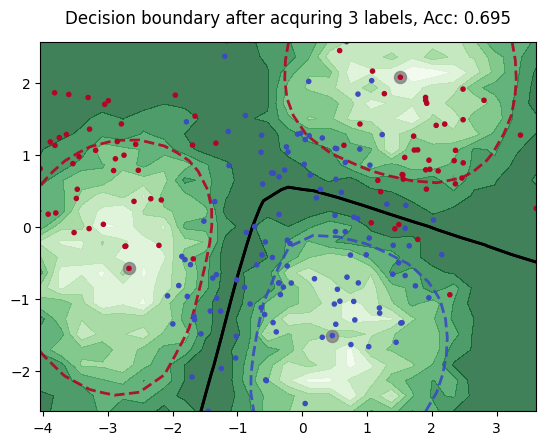

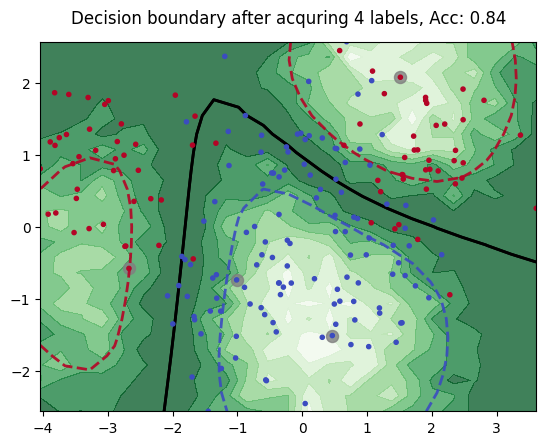

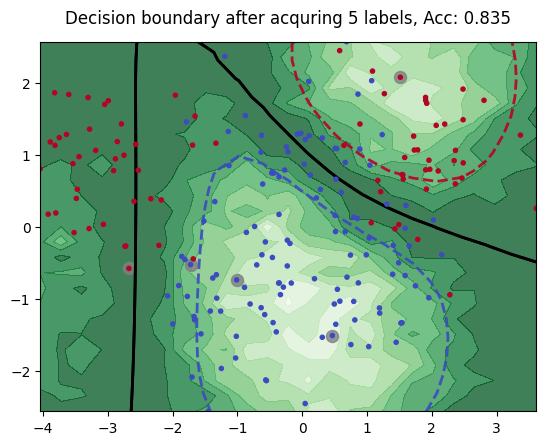

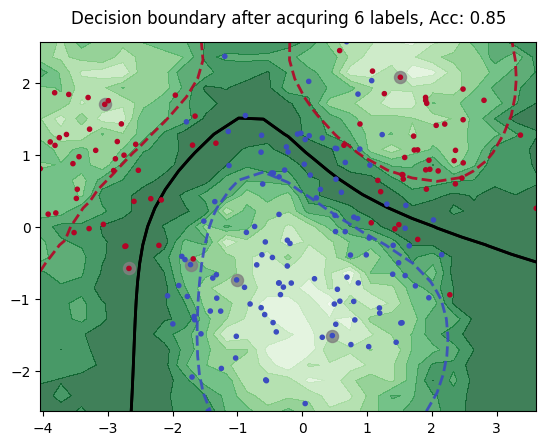

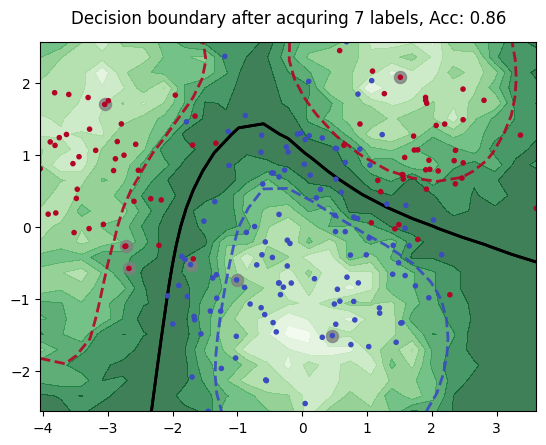

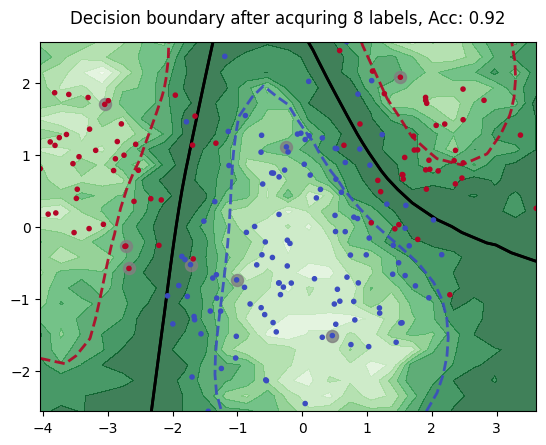

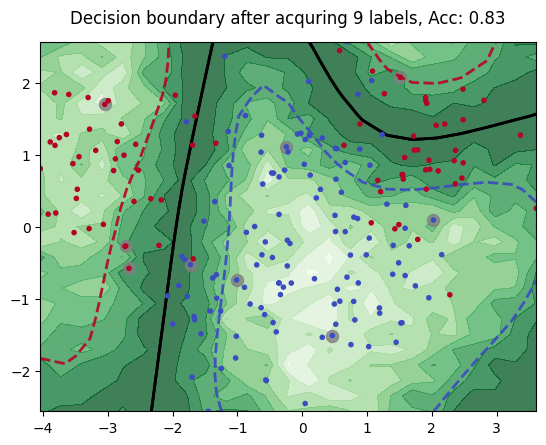

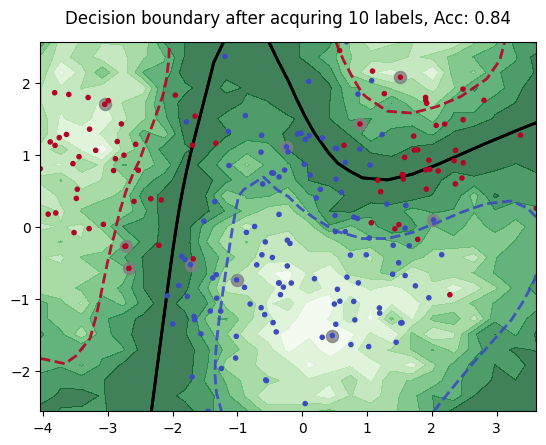

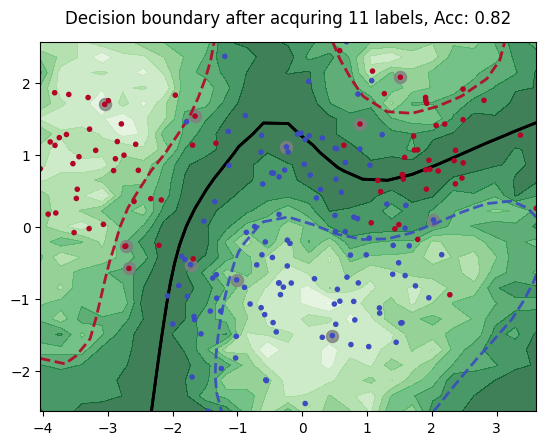

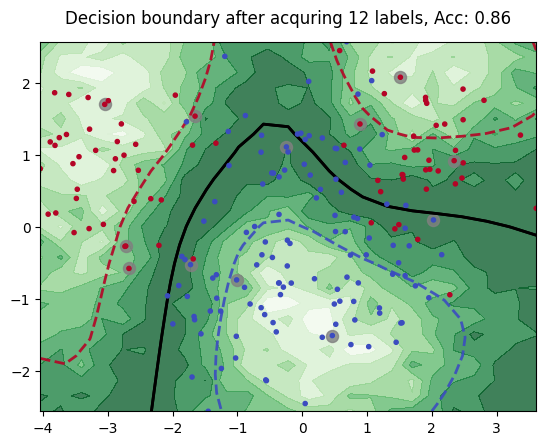

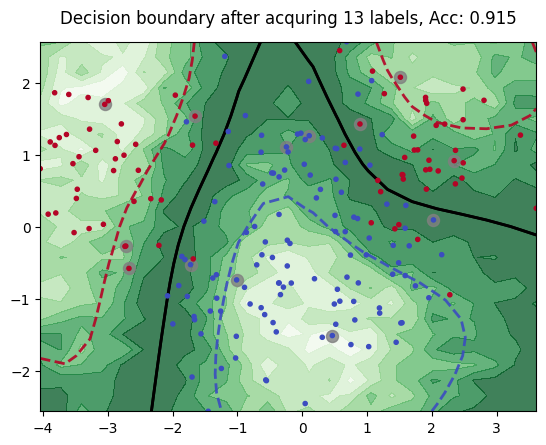

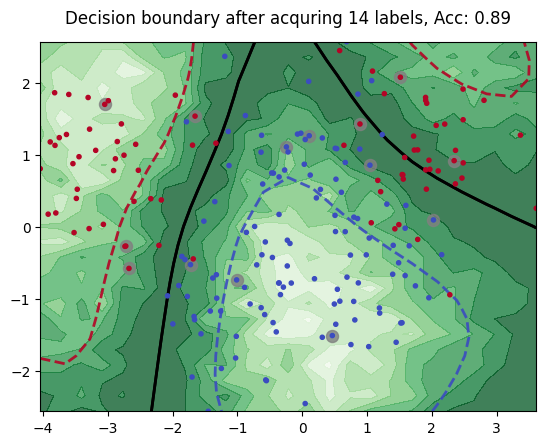

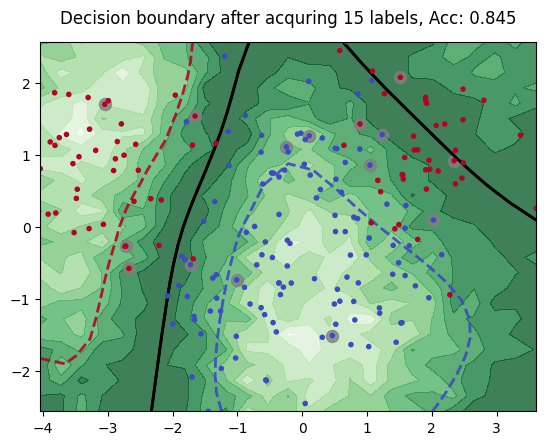

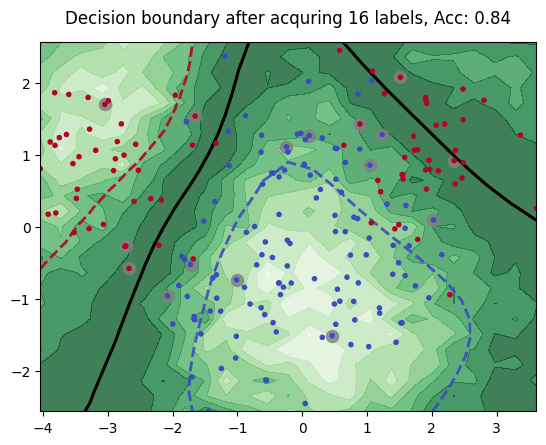

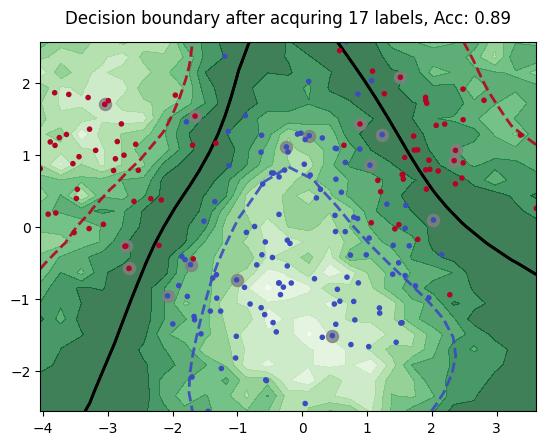

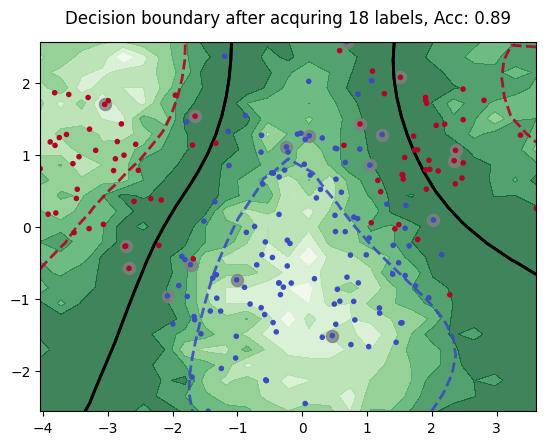

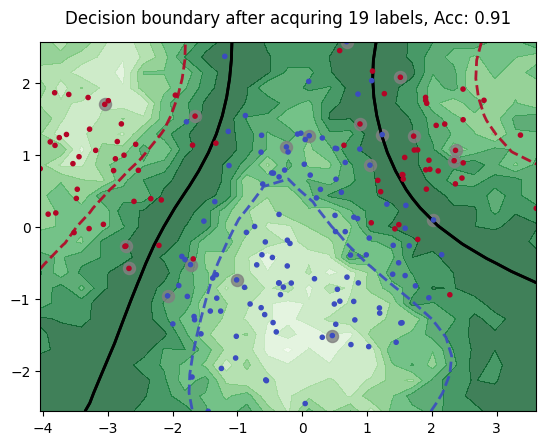

In [3]:
random_state = np.random.RandomState(0)

# Build a dataset.
X, y_true = make_blobs(n_samples=200, n_features=2,
                       centers=[[0, 1], [-3, .5], [-1, -1], [2, 1], [1, -.5]],
                       cluster_std=.7, random_state=random_state)
y_true = y_true % 2
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

# Initialise the classifier.
clf = ParzenWindowClassifier(classes=np.unique(y_true), class_prior=0.1)
# Initialise the query strategy.
qs = QueryByCommittee(method='vote_entropy', sample_predictions_method_name='sample_proba', sample_predictions_dict={'n_samples': 100})

# Preparation for plotting.
feature_bound = [[min(X[:, 0]), min(X[:, 1])], [max(X[:, 0]), max(X[:, 1])]]

# The active learning cycle:
n_cycles = 20
for c in range(n_cycles):
    fig, ax = plt.subplots()
    # Fit the classifier.
    clf.fit(X, y)

    # Get labeled instances.
    X_labeled = X[labeled_indices(y)]

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y, ensemble=clf)
    acc = accuracy_score(y_true, clf.predict(X))

    # Plot the labeled data.
    coll_old = list(ax.collections)
    title = ax.text(
        0.5, 1.05, f"Decision boundary after acquring {c} labels, Acc: {acc}",
        size=plt.rcParams["axes.titlesize"], ha="center",
        transform=ax.transAxes
    )

    ax = plot_utilities(qs, X=X, y=y, ensemble=clf,
                        candidates=None, res=25,
                        feature_bound=feature_bound, ax=ax)
    ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap="coolwarm", marker=".",
               zorder=2)
    ax.scatter(X_labeled[:, 0], X_labeled[:, 1], c="grey", alpha=.8,
               marker=".", s=300)
    ax = plot_decision_boundary(clf, feature_bound, ax=ax)

    # Label the queried instances.
    y[query_idx] = y_true[query_idx]

In [ ]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [32]:
X = optical_recognition_of_handwritten_digits['data']['features'].to_numpy()
y_true = optical_recognition_of_handwritten_digits['data']['targets'].to_numpy().ravel()

indices = np.arange(len(X))
np.random.shuffle(indices)
X, y_true = X[indices], y_true[indices]

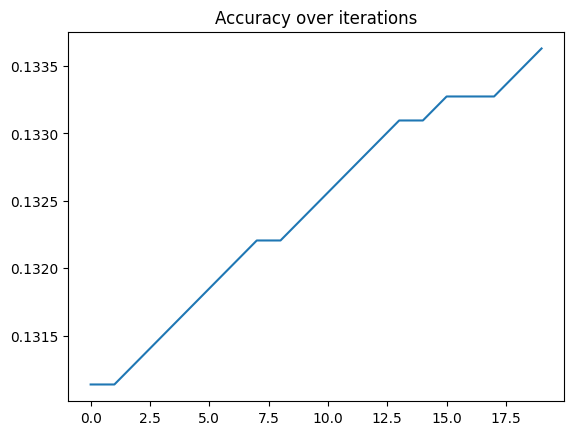

In [40]:
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

# Use the first n instances as initial training data.
n = 200
y[:n] = y_true[:n]

# Create classifier and query strategy.
clf = SklearnClassifier(
    GaussianProcessClassifier(random_state=0),
    classes=np.unique(y_true),
    random_state=0
)
qs = UncertaintySampling(method='entropy')
accs = []

# Execute active learning cycle.
n_cycles = 20
for c in range(n_cycles):
    # Fit final classifier.
    clf.fit(X, y)

    # Get labeled instances.
    X_labeled = X[labeled_indices(y)]

    query_idx = qs.query(X=X, y=y, clf=clf)
    acc = accuracy_score(y_true, clf.predict(X))
    accs.append(acc)

    y[query_idx] = y_true[query_idx]

plt.plot(accs)
plt.title("Accuracy over iterations")
plt.show()

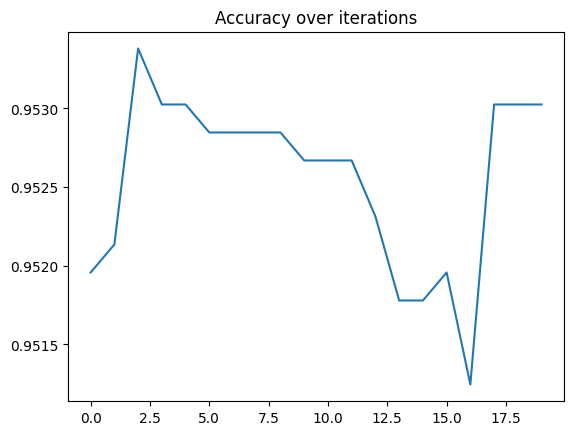

In [41]:
y = np.full(shape=y_true.shape, fill_value=MISSING_LABEL)

# Use the first n instances as initial training data.
n = 200
y[:n] = y_true[:n]

# Initialise the classifier.
clf = ParzenWindowClassifier(classes=np.unique(y_true), class_prior=0.1)
# Initialise the query strategy.
qs = QueryByCommittee(method='vote_entropy', sample_predictions_method_name='sample_proba', sample_predictions_dict={'n_samples': 100})
accs = []

# Execute active learning cycle.
n_cycles = 20
for c in range(n_cycles):
    # Fit final classifier.
    clf.fit(X, y)

    # Get labeled instances.
    X_labeled = X[labeled_indices(y)]

    query_idx = qs.query(X=X, y=y, ensemble=clf)
    acc = accuracy_score(y_true, clf.predict(X))
    accs.append(acc)

    y[query_idx] = y_true[query_idx]

plt.plot(accs)
plt.title("Accuracy over iterations")
plt.show()